GRIP_TASK8_COVID_ANALYSIS
Author: Jay Goyal

The following code aims at providing a detailed Timeline Analysis of the Covid affected regions across the world, and visualizing them.

PROBLEM STATEMENT:
Identify detailed patterns and possible conclusions regarding Covid-19 spread with basic as well as advanced charts.

In [2]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
import pylab as pl
import seaborn as sns
%matplotlib inline

In [4]:
#importing the dataset and exploring it
from google.colab import files
uploaded = files.upload()

Saving owid-covid-data.csv to owid-covid-data (1).csv


In [5]:
covid_data = pd.read_csv('owid-covid-data.csv')
covid_data.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
5,AFG,Asia,Afghanistan,2020-02-29,1.0,0.0,0.143,NaN,NaN,0.0,0.026,0.000,0.004,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
6,AFG,Asia,Afghanistan,2020-03-01,1.0,0.0,0.143,NaN,NaN,0.0,0.026,0.000,0.004,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.78,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
7,AFG,Asia,Afghanistan,2020-03-02,1.0,0.0,0.000,NaN,NaN,0.0,0.026,0.000,0.000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.78,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
8,AFG,Asia,Afghanistan,2020-03-03,2.0,1.0,0.143,NaN,NaN,0.0,0.051,0.026,0.004,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.78,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
9,AFG,Asia,Afghanistan,2020-03-04,4.0,2.0,0.429,NaN,NaN,0.0,0.103,0.051,0.011,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
# Analyzing the rows and columns count of the dataset
covid_data.shape

(22178, 59)

In [7]:
# Analyzing the data types of all the attributes present and their count
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22178 entries, 0 to 22177
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               22178 non-null  object 
 1   continent                              21376 non-null  object 
 2   location                               22178 non-null  object 
 3   date                                   22178 non-null  object 
 4   total_cases                            21920 non-null  float64
 5   new_cases                              21920 non-null  float64
 6   new_cases_smoothed                     21618 non-null  float64
 7   total_deaths                           19524 non-null  float64
 8   new_deaths                             19547 non-null  float64
 9   new_deaths_smoothed                    21618 non-null  float64
 10  total_cases_per_million                21920 non-null  float64
 11  ne

In [8]:
# Descripting of the numerical attributes present in the dataset
covid_data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,2.192000e+04,21920.000000,21618.000000,19524.000000,19547.000000,21618.000000,21920.000000,21920.000000,21618.000000,19524.000000,19547.000000,21618.000000,18519.000000,2748.000000,2748.000000,3070.000000,3070.000000,121.000000,121.000000,302.000000,302.000000,8.421000e+03,8.130000e+03,8130.000000,8421.000000,9506.000000,9506.000000,9136.000000,9105.000000,9.700000e+02,9.180000e+02,5.430000e+02,795.000000,1.642000e+03,970.000000,918.000000,543.000000,1642.000000,19693.000000,2.217800e+04,21353.000000,20506.000000,20506.000000,20506.000000,20619.000000,13214.000000,21283.000000,21352.000000,16191.000000,16191.000000,11422.000000,19063.000000,21375.000000,21229.000000
mean,3.361343e+05,2417.889735,2424.160357,8473.869340,56.042973,50.206388,7558.573709,63.807614,63.797957,180.398250,1.362387,1.217415,0.992111,203.899563,19.616563,1197.385993,140.778929,308.437149,32.906372,1031.829245,127.152430,1.356407e+04,1.600116e+06,194.810126,1.839266,13342.054387,1.762161,0.120179,203.398451,8.216816e+05,5.425426e+05,1.742975e+05,32940.567296,4.699000e+04,3.499897,3.394052,1.272541,1684.149208,59.373736,1.569265e+08,159.326236,30.267536,8.674453,5.506699,16597.859886,12.769555,249.473745,7.721408,10.657816,31.388061,50.014084,2.932160,72.568321,0.718348
std,1.836055e+06,11088.155979,10944.478832,36076.320903,211.760441,193.473403,15402.904893,159.576389,137.843983,322.251644,3.802232,2.755135,0.335816,309.436794,27.127813,1775.402752,197.694425,637.316694,57.932857,2478.105136,235.800833,4.076450e+04,3.597354e+06,377.216972,5.466947,25935.845344,3.907838,0.120696,977.469542,2.963064e+06,1.203759e+06,3.519361e+05,72770.738018,1.689371e+05,5.381909,4.606563,1.927154,2573.067212,22.711980,6.688027e+08,312.499299,8.936745,5.892297,3.970436,15429.068472,20.129154,110.103970,3.493091,11.117042,13.636740,33.477218,2.164168,7.887850,0.150583
min,1.000000e+00,-7953.000000,-525.000000,1.000000,-117.000000,-14.429000,0.001000,-450.772000,-29.757000,0.001000,-10.095000,-1.245000,0.000000,0.000000,0.000000,0.000000,0.000000,0.986000,0.752000,0.000000,0.000000,-7.549300e+04,1.000000e+00,0.000000,-23.010000,0.000000,0.000000,0.000000,1.300000,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.500200e+04,3.202000,16.700000,2.372000,1.337000,661.240000,0.200000,105.599000,0.990000,0.200000,8.500000,2.735000,0.300000,53.280000,0.397000
25%,7.517500e+02,1.000000,6.429000,44.000000,0.000000,0.000000,165.022000,0.061000,1.159250,6.075500,0.000000,0.000000,0.840000,12.000000,2.283000,79.250000,13.700000,3.993000,2.252000,28.041000,9.870750,1.177000e+03,1.102045e+05,12.413250,0.142000,1362.250000,0.191000,0.022000,5.300000,2.153650e+04,2.827525e+04,1.457850e+04,1897.000000,6.052500e+02,0.300000,0.392500,0.185000,222.250000,44.440000,1.701583e+06,31.033000,22.400000,3.526000,2.063000,3645.070000,0.70000

In [9]:
# Identifying the columns present
covid_data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [10]:
#Checking for count of all the unique values present for each attribute
covid_data.nunique()

iso_code                                    63
continent                                    6
location                                    63
date                                       433
total_cases                              13690
new_cases                                 4090
new_cases_smoothed                        7655
total_deaths                              5987
new_deaths                                 926
new_deaths_smoothed                       2122
total_cases_per_million                  16878
new_cases_per_million                    10587
new_cases_smoothed_per_million           12935
total_deaths_per_million                 10933
new_deaths_per_million                    2352
new_deaths_smoothed_per_million           3546
reproduction_rate                          286
icu_patients                               711
icu_patients_per_million                  1289
hosp_patients                             1520
hosp_patients_per_million                 2248
weekly_icu_ad

In [11]:
# Checking for count of NULL values for each column 
covid_data.isnull().sum()

iso_code                                     0
continent                                  802
location                                     0
date                                         0
total_cases                                258
new_cases                                  258
new_cases_smoothed                         560
total_deaths                              2654
new_deaths                                2631
new_deaths_smoothed                        560
total_cases_per_million                    258
new_cases_per_million                      258
new_cases_smoothed_per_million             560
total_deaths_per_million                  2654
new_deaths_per_million                    2631
new_deaths_smoothed_per_million            560
reproduction_rate                         3659
icu_patients                             19430
icu_patients_per_million                 19430
hosp_patients                            19108
hosp_patients_per_million                19108
weekly_icu_ad

In [12]:
# Continents in terms of occurence of covid cases on basis of iso_codes
covid_data.continent.value_counts()[0:10]

Africa           6920
Europe           4536
North America    3791
Asia             3427
South America    2294
Oceania           408
Name: continent, dtype: int64

In [13]:
# Analyzing cases worldwide 
dataset = covid_data[covid_data['date']=='2020-11-15']
dataset = dataset[~dataset['location'].isin(['World','International'])]
dataset.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
265,AFG,Asia,Afghanistan,2020-11-15,43240.0,205.0,154.429,1620.0,12.0,7.857,1110.759,5.266,3.967,41.615,0.308,0.202,1.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.04,3.892834e+07,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.511
655,OWID_AFR,NaN,Africa,2020-11-15,1976022.0,12570.0,13308.857,47362.0,296.0,286.000,1473.985,9.376,9.928,35.329,0.221,0.213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.340598e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1033,ALB,Europe,Albania,2020-11-15,27830.0,597.0,517.714,623.0,11.0,9.143,9670.582,207.450,179.899,216.485,3.822,3.177,1.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2106.0,147986.0,51.423,0.732,1906.0,0.662,0.272,3.7,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.74,2.877800e+06,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795
1411,DZA,Africa,Algeria,2020-11-15,67679.0,860.0,804.000,2154.0,15.0,15.143,1543.384,19.612,18.335,49.121,0.342,0.345,1.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.22,4.385104e+07,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,0.748
1783,AND,Europe,Andorra,2020-11-15,5872.0,147.0,69.857,76.0,1.0,0.143,75998.188,1902.543,904.124,983.628,12.942,1.849,1.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,772.0,9.992,0.090,11.1,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.26,7.726500e+04,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.868
2137,AGO,Africa,Angola,2020-11-15,13451.0,77.0,145.429,322.0,0.0,2.143,409.265,2.343,4.425,9.797,0.000,0.065,0.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.19,3.286627e+07,23.890,16.8,2.405,1.362,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581
2521,ATG,North America,Antigua and Barbuda,2020-11-15,134.0,0.0,0.429,4.0,0.0,0.143,1368.352,0.000,4.376,40.846,0.000,1.459,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.792800e+04,231.845,32.1,6.933,4.631,21490.943,NaN,191.511,13.17,NaN,NaN,NaN,3.80,77.02,0.778
2954,ARG,South America,Argentina,2020-11-15,1310491.0,5645.0,9758.429,35436.0,129.0,268.000,28995.873,124.901,215.915,784.056,2.854,5.930,0.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11353.0,3222703.0,71.305,0.251,23629.0,0.523,0.413,2.4,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.17,4.519578e+07,16.177,31.9,11.198,7.441,18933.907,0.6,191.032,5.50,16.2,27.7,NaN,5.00,76.67,0.845
3327,ARM,Asia,Armenia,2020-11-15,117337.0,1482.0,1559.000,1763.0,25.0,29.143,39597.615,500.129,526.114,594.958,8.437,9.835,0.89,NaN,NaN,NaN,NaN,N

In [14]:
# download countries geojson file
!wget --quiet https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/world_countries.json
    
print('GeoJSON file downloaded!')
world_geo = r'world_countries.json' # geojson file

# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2)

# generate choropleth map using the total deaths worldwide
world_map.choropleth(
    geo_data=world_geo,
    data=dataset,
    columns=['location', 'total_deaths'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Covid 19 deaths worldwide'
)

# display map
world_map

GeoJSON file downloaded!


/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [15]:
#Top 10 countries in terms of total_deaths
top_10_deaths  =  dataset.sort_values("total_deaths",ascending = False)
top_10_deaths.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
3739,OWID_ASI,NaN,Asia,2020-11-15,15118723.0,81910.0,93796.714,266621.0,1463.0,1556.571,3258.453,17.654,20.215,57.463,0.315,0.335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.639847e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9720,BRA,South America,Brazil,2020-11-15,5863093.0,14134.0,28425.429,165798.0,140.0,485.857,27583.314,66.494,133.729,780.008,0.659,2.286,1.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.17,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765
655,OWID_AFR,NaN,Africa,2020-11-15,1976022.0,12570.0,13308.857,47362.0,296.0,286.000,1473.985,9.376,9.928,35.329,0.221,0.213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.340598e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2954,ARG,South America,Argentina,2020-11-15,1310491.0,5645.0,9758.429,35436.0,129.0,268.000,28995.873,124.901,215.915,784.056,2.854,5.930,0.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11353.0,3222703.0,71.305,0.251,23629.0,0.523,0.413,2.4,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.17,4.519578e+07,16.177,31.9,11.198,7.441,18933.907,0.6,191.032,5.50,16.2,27.7,NaN,5.00,76.67,0.845
14639,COL,South America,Colombia,2020-11-15,1198746.0,7112.0,7837.000,34031.0,202.0,177.143,23558.924,139.772,154.020,668.810,3.970,3.481,0.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26349.0,5713384.0,112.285,0.518,47295.0,0.929,0.186,5.4,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.74,5.088288e+07,44.223,32.2,7.646,4.312,13254.949,4.5,124.240,7.44,4.7,13.5,65.386,1.71,77.29,0.767
13859,CHL,South America,Chile,2020-11-15,531273.0,1597.0,1387.857,14819.0,42.0,39.429,27791.755,83.542,72.601,775.206,2.197,2.063,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40814.0,4822677.0,252.282,2.135,34105.0,1.784,0.045,22.2,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.94,1.911621e+07,24.282,35.4,11.087,6.938,22767.037,1.3,127.993,8.46,34.2,41.5,NaN,2.11,80.18,0.851
7137,BEL,Europe,Belgium,2020-11-15,535939.0,4659.0,5021.429,14421.0,118.0,195.143,46243.033,401.998,433.270,1244.304,10.182,16.838,0.68,1439.0,124.163,6518.0,562.400,NaN,NaN,3261.907,281.451,13824.0,5503037.0,474.825,1.193,28501.0,2.459,0.195,5.1,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.74,1.158962e+07,375.564,41.8,18.571,12.849,42658.576,0.2,114.898,4.29,25.1,31.4,NaN,5.64,81.63,0.931
19742,ECU,South America,Ecuador,2020-11-15,180295.0,668.0,769.714,13008.0,11.0,25.429,10219.032,37.862,43.627,737.287,0.623,1.441,0.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3145.0,546619.0,30.982,0.178,3314.0,0.188,0.232,4.3,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.78,1.764306e+07,66.939,28.1,7.104,4.458,10581.936,3

Text(0.5, 1.0, 'Total deaths across the top 5 countries')

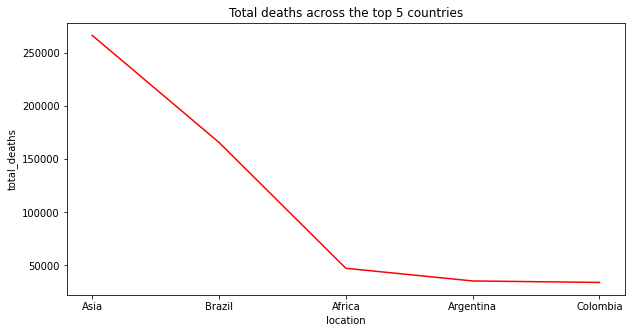

In [16]:
plt.figure(figsize=(10,5))
sns.lineplot(x='location',y='total_deaths',data=top_10_deaths[0:5],color='red')
plt.title("Total deaths across the top 5 countries")

In [24]:
#Top 10 countries in terms of total_deaths
top_10_new_cases  =  dataset.sort_values("new_cases",ascending = False)
top_10_new_cases.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
3739,OWID_ASI,NaN,Asia,2020-11-15,15118723.0,81910.0,93796.714,266621.0,1463.0,1556.571,3258.453,17.654,20.215,57.463,0.315,0.335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.639847e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9720,BRA,South America,Brazil,2020-11-15,5863093.0,14134.0,28425.429,165798.0,140.0,485.857,27583.314,66.494,133.729,780.008,0.659,2.286,1.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.17,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765
655,OWID_AFR,NaN,Africa,2020-11-15,1976022.0,12570.0,13308.857,47362.0,296.0,286.000,1473.985,9.376,9.928,35.329,0.221,0.213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.340598e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14639,COL,South America,Colombia,2020-11-15,1198746.0,7112.0,7837.000,34031.0,202.0,177.143,23558.924,139.772,154.020,668.810,3.970,3.481,0.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26349.0,5713384.0,112.285,0.518,47295.0,0.929,0.186,5.4,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.74,5.088288e+07,44.223,32.2,7.646,4.312,13254.949,4.5,124.240,7.44,4.7,13.5,65.386,1.71,77.29,0.767
4525,AUT,Europe,Austria,2020-11-15,203956.0,5665.0,7257.571,1829.0,83.0,59.714,22645.674,628.997,805.824,203.078,9.216,6.630,1.07,599.0,66.508,3579.0,397.384,NaN,NaN,NaN,NaN,27080.0,2667880.0,296.220,3.007,30741.0,3.413,0.236,4.2,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.00,9.006400e+06,106.749,44.4,19.202,13.748,45436.686,0.7,145.183,6.35,28.4,30.9,NaN,7.37,81.54,0.922
2954,ARG,South America,Argentina,2020-11-15,1310491.0,5645.0,9758.429,35436.0,129.0,268.000,28995.873,124.901,215.915,784.056,2.854,5.930,0.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11353.0,3222703.0,71.305,0.251,23629.0,0.523,0.413,2.4,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.17,4.519578e+07,16.177,31.9,11.198,7.441,18933.907,0.6,191.032,5.50,16.2,27.7,NaN,5.00,76.67,0.845
7137,BEL,Europe,Belgium,2020-11-15,535939.0,4659.0,5021.429,14421.0,118.0,195.143,46243.033,401.998,433.270,1244.304,10.182,16.838,0.68,1439.0,124.163,6518.0,562.400,NaN,NaN,3261.907,281.451,13824.0,5503037.0,474.825,1.193,28501.0,2.459,0.195,5.1,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.74,1.158962e+07,375.564,41.8,18.571,12.849,42658.576,0.2,114.898,4.29,25.1,31.4,NaN,5.64,81.63,0.931
12341,CAN,North America,Canada,2020-11-15,299440.0,4301.0,4610.714,11078.0,65.0,62.429,7933.834,113.957,122.164,293.518,1.722,1.654,1.15,373.0,9.883,1780.0,47.162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.43,3.774216e+07,4.037,41.4,16.984,10.797,44017.591,0.5,105.59

In [25]:
#Top 10 countries with least cases 
top_10_least_total_cases  =  dataset.sort_values("total_cases",ascending = True)
top_10_least_total_cases.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
18996,DMA,North America,Dominica,2020-11-15,68.0,0.0,0.714,NaN,NaN,0.000,944.563,0.000,9.922,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.26,71991.0,98.567,NaN,NaN,NaN,9673.367,NaN,227.376,11.62,NaN,NaN,NaN,3.8,75.00,0.742
2521,ATG,North America,Antigua and Barbuda,2020-11-15,134.0,0.0,0.429,4.0,0.0,0.143,1368.352,0.000,4.376,40.846,0.000,1.459,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97928.0,231.845,32.1,6.933,4.631,21490.943,NaN,191.511,13.17,NaN,NaN,NaN,3.8,77.02,0.778
10085,BRN,Asia,Brunei,2020-11-15,148.0,0.0,0.000,3.0,0.0,0.000,338.299,0.000,0.000,6.857,0.000,0.000,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.19,437483.0,81.347,32.4,4.591,2.382,71809.251,NaN,201.285,12.79,2.0,30.9,NaN,2.7,75.86,0.838
6363,BRB,North America,Barbados,2020-11-15,250.0,1.0,1.143,7.0,0.0,0.000,869.956,3.480,3.977,24.359,0.000,0.000,0.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.74,287371.0,664.463,39.8,14.952,9.473,16978.068,NaN,170.050,13.57,1.9,14.5,88.469,5.8,79.19,0.814
11565,KHM,Asia,Cambodia,2020-11-15,302.0,0.0,0.714,NaN,NaN,0.000,18.063,0.000,0.043,NaN,NaN,0.000,0.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.81,16718971.0,90.672,25.6,4.412,2.385,3645.070,NaN,270.892,4.00,2.0,33.7,66.229,0.8,69.82,0.594
8267,BTN,Asia,Bhutan,2020-11-15,375.0,0.0,2.286,NaN,NaN,0.000,485.996,0.000,2.962,NaN,NaN,0.000,0.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1461.0,188891.0,244.8,1.893,1064.0,1.379,0.002,465.4,samples tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.67,771612.0,21.188,28.6,4.885,2.977,8708.597,1.5,217.066,9.75,NaN,NaN,79.807,1.7,71.78,0.654
21198,ERI,Africa,Eritrea,2020-11-15,493.0,0.0,0.286,NaN,NaN,0.000,139.013,0.000,0.081,NaN,NaN,0.000,0.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.41,3546427.0,44.304,19.3,3.607,2.171,1510.459,NaN,311.110,6.05,0.2,11.4,NaN,0.7,66.32,0.459
14952,COM,Africa,Comoros,2020-11-15,579.0,0.0,2.286,7.0,0.0,0.000,665.827,0.000,2.628,8.050,0.000,0.000,0.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,869595.0,437.352,20.4,2.963,1.726,1413.890,18.1,261.516,11.88,4.4,23.6,15.574,2.2,64.32,0.554
11158,BDI,Africa,Burundi,2020-11-15,628.0,1.0,2.286,1.0,0.0,0.000,52.814,0.084,0.192,0.084,0.000,0.000,0.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.81,11890781.0,423.062,17.5,2.562,1.504,702.225,71.7,293.068,6.05,NaN,NaN,6.144,0.8,61.58,0.433
13479,TCD,Afric


Analysis of Covid Cases across Asia

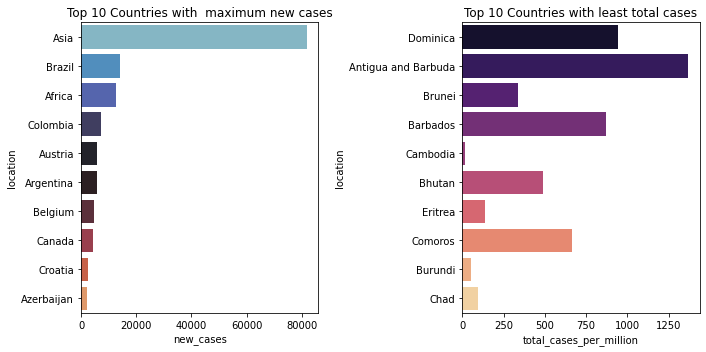

In [42]:
#Visualizing top 10 countries with maximum  new cases 
fig,axes = plt.subplots(figsize=(10,5),nrows =1, ncols = 2)
sns.barplot(x =top_10_new_cases["new_cases"][:10], y = top_10_new_cases["location"][:10],
           ax = axes[0], palette ="icefire", orient = "h");
axes[0].set_title("Top 10 Countries with  maximum new cases")

#Visualizing top 10 countries with  least total cases 
sns.barplot(x =top_10_least_total_cases["total_cases_per_million"][:10], y = top_10_least_total_cases["location"][:10],
           ax =axes[1], palette = "magma", orient = "h")
axes[1].set_title("Top 10 Countries with least total cases")
fig.tight_layout()

In [31]:

# Collating the Asia Data from the given dataset
asia_data = covid_data[covid_data['continent'] =='Asia']
asia_data = asia_data[asia_data['date'] =='2020-12-31']
asia_data = asia_data[~asia_data['location'].isin(['World','International'])]
asia_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
311,AFG,Asia,Afghanistan,2020-12-31,51526.0,121.0,124.429,2191.0,10.0,9.286,1323.612,3.108,3.196,56.283,0.257,0.239,0.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.04,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3373,ARM,Asia,Armenia,2020-12-31,159409.0,531.0,466.714,2823.0,16.0,15.571,53795.617,179.196,157.502,952.675,5.400,5.255,0.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2518.0,0.850,0.185,5.4,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2963234.0,102.931,35.7,11.232,7.571,8787.580,1.8,341.010,7.11,1.5,52.1,94.043,4.2,75.09,0.776
4944,AZE,Asia,Azerbaijan,2020-12-31,218700.0,1064.0,1234.143,2641.0,32.0,37.286,21569.802,104.940,121.720,260.475,3.156,3.677,0.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.26,10139175.0,119.309,32.4,6.018,3.871,15847.419,NaN,559.812,7.11,0.3,42.5,83.241,4.7,73.00,0.756
5681,BHR,Asia,Bahrain,2020-12-31,92675.0,250.0,229.286,352.0,0.0,0.286,54463.990,146.922,134.748,206.866,0.000,0.168,1.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9988.0,2355313.0,1384.189,5.87,9129.0,5.365,0.025,39.8,units unclear,58643.0,58643.0,NaN,1326.0,1225.0,3.45,3.45,NaN,720.0,50.93,1701583.0,1935.907,32.4,2.372,1.387,43290.705,NaN,151.689,16.52,5.8,37.6,NaN,2.0,77.29,0.852
6052,BGD,Asia,Bangladesh,2020-12-31,513510.0,1014.0,1058.286,7559.0,28.0,25.857,3118.052,6.157,6.426,45.899,0.170,0.157,0.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13254.0,3224409.0,19.579,0.08,13135.0,0.080,0.081,12.4,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.09,164689383.0,1265.036,27.5,5.098,3.262,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8,72.59,0.632


In [32]:

asia_data.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
6052,BGD,Asia,Bangladesh,2020-12-31,513510.0,1014.0,1058.286,7559.0,28.0,25.857,3118.052,6.157,6.426,45.899,0.170,0.157,0.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13254.0,3224409.0,19.579,0.080,13135.0,0.080,0.081,12.4,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.09,1.646894e+08,1265.036,27.5,5.098,3.262,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.80,72.59,0.632
8313,BTN,Asia,Bhutan,2020-12-31,670.0,15.0,21.571,NaN,NaN,0.000,868.312,19.440,27.956,NaN,NaN,0.000,0.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7339.0,281699.0,365.079,9.511,6189.0,8.021,0.003,286.9,samples tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.94,7.716120e+05,21.188,28.6,4.885,2.977,8708.597,1.5,217.066,9.75,NaN,NaN,79.807,1.70,71.78,0.654
10131,BRN,Asia,Brunei,2020-12-31,157.0,0.0,0.714,3.0,0.0,0.000,358.871,0.000,1.633,6.857,0.000,0.000,0.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.19,4.374830e+05,81.347,32.4,4.591,2.382,71809.251,NaN,201.285,12.79,2.0,30.9,NaN,2.70,75.86,0.838
11611,KHM,Asia,Cambodia,2020-12-31,378.0,12.0,2.143,NaN,NaN,0.000,22.609,0.718,0.128,NaN,NaN,0.000,0.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.63,1.671897e+07,90.672,25.6,4.412,2.385,3645.070,NaN,270.892,4.00,2.0,33.7,66.229,0.80,69.82,0.594
14317,CHN,Asia,China,2020-12-31,95963.0,87.0,82.857,4782.0,1.0,1.857,66.672,0.060,0.058,3.322,0.001,0.001,0.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4500000.0,NaN,NaN,NaN,187500.0,0.31,NaN,NaN,130.0,78.24,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761


In [33]:

top_10_asia_deaths  = asia_data.sort_values("total_deaths", ascending = False)
top_10_asia_deaths.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
6052,BGD,Asia,Bangladesh,2020-12-31,513510.0,1014.0,1058.286,7559.0,28.0,25.857,3118.052,6.157,6.426,45.899,0.170,0.157,0.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13254.0,3224409.0,19.579,0.08,13135.0,0.08,0.081,12.4,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.09,1.646894e+08,1265.036,27.5,5.098,3.262,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.80,72.59,0.632
14317,CHN,Asia,China,2020-12-31,95963.0,87.0,82.857,4782.0,1.0,1.857,66.672,0.060,0.058,3.322,0.001,0.001,0.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4500000.0,NaN,NaN,NaN,187500.0,0.31,NaN,NaN,130.0,78.24,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761
3373,ARM,Asia,Armenia,2020-12-31,159409.0,531.0,466.714,2823.0,16.0,15.571,53795.617,179.196,157.502,952.675,5.400,5.255,0.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2518.0,0.85,0.185,5.4,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.963234e+06,102.931,35.7,11.232,7.571,8787.580,1.8,341.010,7.11,1.5,52.1,94.043,4.20,75.09,0.776
4944,AZE,Asia,Azerbaijan,2020-12-31,218700.0,1064.0,1234.143,2641.0,32.0,37.286,21569.802,104.940,121.720,260.475,3.156,3.677,0.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.26,1.013918e+07,119.309,32.4,6.018,3.871,15847.419,NaN,559.812,7.11,0.3,42.5,83.241,4.70,73.00,0.756
311,AFG,Asia,Afghanistan,2020-12-31,51526.0,121.0,124.429,2191.0,10.0,9.286,1323.612,3.108,3.196,56.283,0.257,0.239,0.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.04,3.892834e+07,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.511


Text(0.5, 1.0, 'Total deaths across asian countries')

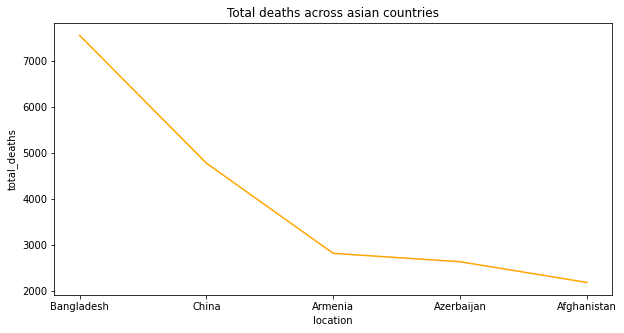

In [34]:
plt.figure(figsize=(10,5))
sns.lineplot(x='location',y='total_deaths',data=top_10_asia_deaths[0:5],color='orange')
plt.title("Total deaths across asian countries")

In [35]:

# Top 10 Asian countries with least number of  total_cases being reported
top_10_least_asia_cases = asia_data.sort_values("total_cases_per_million",ascending =True)
top_10_least_asia_cases.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
11611,KHM,Asia,Cambodia,2020-12-31,378.0,12.0,2.143,NaN,NaN,0.000,22.609,0.718,0.128,NaN,NaN,0.000,0.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.63,1.671897e+07,90.672,25.6,4.412,2.385,3645.070,NaN,270.892,4.00,2.0,33.7,66.229,0.80,69.82,0.594
14317,CHN,Asia,China,2020-12-31,95963.0,87.0,82.857,4782.0,1.0,1.857,66.672,0.060,0.058,3.322,0.001,0.001,0.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4500000.0,NaN,NaN,NaN,187500.0,0.31,NaN,NaN,130.0,78.24,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761
10131,BRN,Asia,Brunei,2020-12-31,157.0,0.0,0.714,3.0,0.0,0.000,358.871,0.000,1.633,6.857,0.000,0.000,0.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.19,4.374830e+05,81.347,32.4,4.591,2.382,71809.251,NaN,201.285,12.79,2.0,30.9,NaN,2.70,75.86,0.838
8313,BTN,Asia,Bhutan,2020-12-31,670.0,15.0,21.571,NaN,NaN,0.000,868.312,19.440,27.956,NaN,NaN,0.000,0.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7339.0,281699.0,365.079,9.511,6189.0,8.021,0.003,286.9,samples tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.94,7.716120e+05,21.188,28.6,4.885,2.977,8708.597,1.5,217.066,9.75,NaN,NaN,79.807,1.70,71.78,0.654
311,AFG,Asia,Afghanistan,2020-12-31,51526.0,121.0,124.429,2191.0,10.0,9.286,1323.612,3.108,3.196,56.283,0.257,0.239,0.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.04,3.892834e+07,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.511


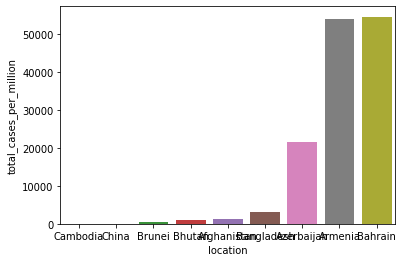

In [36]:
# Least number of toal_cases reported across Asian Countries
sns.barplot(x="location", y="total_cases_per_million", data=top_10_least_asia_cases.head(10))

Text(0.5, 1.0, 'Total Cases vs Total Death Scenarios')

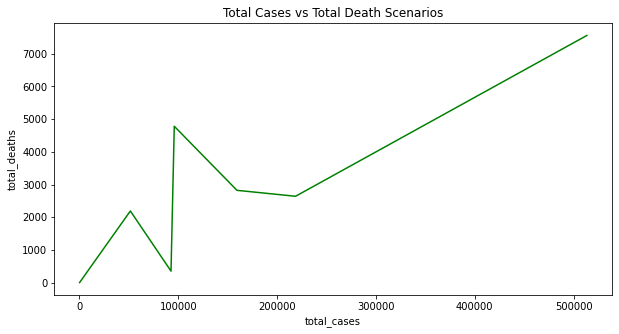

In [37]:
plt.figure(figsize=(10,5))
sns.lineplot(x='total_cases',y='total_deaths',data=asia_data,color="green")
plt.title("Total Cases vs Total Death Scenarios")

Text(0.5, 1.0, 'Total tests Vs Posititve Rate of cases ')

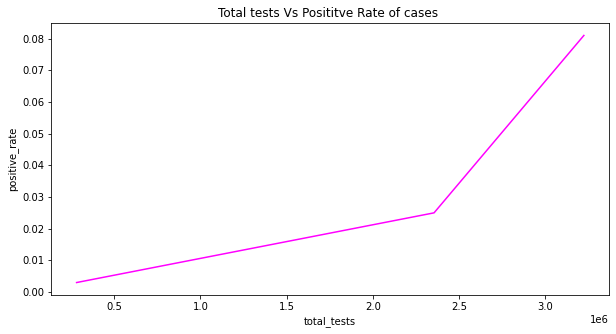

In [38]:
plt.figure(figsize=(10,5))
sns.lineplot(x='total_tests',y='positive_rate',data=asia_data,color="magenta")
plt.title("Total tests Vs Posititve Rate of cases ")

Conclusion
--> United States has been the most affected country worldwide.

--> India is the most affected Asian Country.

--> Laos has reported the least number of cases in Asia.

--> Marshall Islands (Oceania) has reported the least number of cases worldwide.